# Python for Data Science-Assignment 1

## Exploring and Visualizing London Crime Data by Lsoa

### Import Libraries

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import folium

### Read data pada file csv london_crime_by_lsoa

In [2]:
df = pd.read_csv('../Assignment1/dataset/london_crime_by_lsoa.csv')
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


### Cek jumlah baris dan kolom

In [3]:
df.shape

(13490604, 7)

In [4]:
df['value'].value_counts()

value
0      10071505
1       2141789
2        712478
3        275501
4        119483
         ...   
216           1
151           1
243           1
188           1
218           1
Name: count, Length: 247, dtype: int64

Kolom value merupakan jumlah tindak kriminal tertentu ditahun dan bulan tersebut, sehingga data dengan value 0 tidak diperlukan.

### Cleaning Data

In [5]:
df_without_null = df[df['value'] > 0]
df_without_null.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
16,E01000086,Barking and Dagenham,Theft and Handling,Other Theft Person,1,2009,5
24,E01001301,Ealing,Theft and Handling,Other Theft Person,2,2012,1
25,E01001794,Hackney,Violence Against the Person,Harassment,1,2013,2
32,E01000733,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4


### Exploring Data

#### Year

In [6]:
years = [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]

In [7]:
df_year = df_without_null.groupby('year')['value'].sum().reset_index(name='total_crime')
df_year

,year,total_crime
0,2008,738641
1,2009,717214
2,2010,715324
3,2011,724915
4,2012,737329
5,2013,686407
6,2014,680183
7,2015,711624
8,2016,736121


In [8]:
df_year.set_index('year', inplace=True)
df_year

,total_crime
year,
2008,738641
2009,717214
2010,715324
2011,724915
2012,737329
2013,686407
2014,680183
2015,711624
2016,736121


In [9]:
df_year.sort_values('total_crime', ascending=False)

,total_crime
year,
2008,738641
2012,737329
2016,736121
2011,724915
2009,717214
2010,715324
2015,711624
2013,686407
2014,680183


Tahun dengan tindakan kriminal terbanyak adalah tahun 2008 dan terendah adalah 2014. Ini bisa diexplore lebih jauh lagi apakah ada alasannya

In [10]:
df_year_2008 = df_without_null.groupby(['year', 'major_category'])['value'].sum().reset_index(name='total_crime')
df_year_2008 = df_year_2008[df_year_2008['year'] == 2008]
df_year_2008.drop('year', axis=1, inplace=True)
df_year_2008.set_index('major_category', inplace=True)
df_year_2008

,total_crime
major_category,
Burglary,88092
Criminal Damage,91872
Drugs,68804
Fraud or Forgery,5325
Other Notifiable Offences,10112
Robbery,29627
Sexual Offences,1273
Theft and Handling,283692
Violence Against the Person,159844


In [11]:
df_year_2008.sort_values('total_crime', ascending=False)

,total_crime
major_category,
Theft and Handling,283692
Violence Against the Person,159844
Criminal Damage,91872
Burglary,88092
Drugs,68804
Robbery,29627
Other Notifiable Offences,10112
Fraud or Forgery,5325
Sexual Offences,1273


Pada tahun 2008 di mana kasus kriminalitas paling tinggi di antara tahun 2008 sampai 2016, major category yang paling banyak adalah Theft and Handling

In [12]:
df_year_2008_theft_and_handling = df_without_null.groupby(['year', 'major_category', 'minor_category'])['value'].sum().reset_index(name='total_crime')
df_year_2008_theft_and_handling = df_year_2008_theft_and_handling[(df_year_2008_theft_and_handling['year'] == 2008) & (df_year_2008_theft_and_handling['major_category'] == 'Theft and Handling')]
df_year_2008_theft_and_handling.sort_values('total_crime', ascending=False)

,year,major_category,minor_category,total_crime
19,2008,Theft and Handling,Other Theft,99280
21,2008,Theft and Handling,Theft From Motor Vehicle,76570
22,2008,Theft and Handling,Theft From Shops,32857
23,2008,Theft and Handling,Theft/Taking Of Motor Vehicle,28303
20,2008,Theft and Handling,Other Theft Person,24453
24,2008,Theft and Handling,Theft/Taking of Pedal Cycle,15895
18,2008,Theft and Handling,Motor Vehicle Interference & Tampering,3868
17,2008,Theft and Handling,Handling Stolen Goods,2466


Tabel di atas menunjukkan urutan minor category berdasarkan Theft and Handling pada tahun 2008

### Month

In [13]:
df_month = df_without_null.groupby('month')['value'].sum().reset_index(name='total_crime')
df_month

,month,total_crime
0,1,530247
1,2,500537
2,3,551795
3,4,520648
4,5,552704
5,6,549041
6,7,563076
7,8,532784
8,9,522377
9,10,558252


In [14]:
df_month.sort_values('total_crime', ascending=False)

,month,total_crime
6,7,563076
9,10,558252
4,5,552704
2,3,551795
10,11,549671
5,6,549041
7,8,532784
0,1,530247
8,9,522377
3,4,520648


Bulan dengan tingkat kriminalitas tertinggi adalah bulan Juli dan terendah adalah bulan Februari. Fakta ini bisa diexplore lebih lanjut

### Borough

In [15]:
df_borough = df_without_null.groupby('borough')['value'].sum().reset_index(name='total_crime')
df_borough.set_index('borough', inplace=True)
df_borough

,total_crime
borough,
Barking and Dagenham,149447
Barnet,212191
Bexley,114136
Brent,227551
Bromley,184349
Camden,275147
City of London,780
Croydon,260294
Ealing,251562


In [16]:
top10_crime_per_borough = df_borough.sort_values('total_crime', ascending=False).head(10)
top10_crime_per_borough

,total_crime
borough,
Westminster,455028
Lambeth,292178
Southwark,278809
Camden,275147
Newham,262024
Croydon,260294
Ealing,251562
Islington,230286
Tower Hamlets,228613


In [17]:
bottom10_crime_per_borough = df_borough.sort_values('total_crime', ascending=True).head(10)
bottom10_crime_per_borough

,total_crime
borough,
City of London,780
Kingston upon Thames,89306
Richmond upon Thames,96771
Sutton,100987
Bexley,114136
Merton,115654
Harrow,116848
Havering,138947
Barking and Dagenham,149447


Daerah dengan tingkat kriminalitas tertinggi adalah Westminster dan terendah adalah City of London

### Major Category

In [18]:
df_without_null.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
16,E01000086,Barking and Dagenham,Theft and Handling,Other Theft Person,1,2009,5
24,E01001301,Ealing,Theft and Handling,Other Theft Person,2,2012,1
25,E01001794,Hackney,Violence Against the Person,Harassment,1,2013,2
32,E01000733,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4


#### Year

In [19]:
df_major_category_per_year = df_without_null.groupby(['major_category', 'year'])['value'].sum()
df_major_category_per_year = df_major_category_per_year.unstack()
df_major_category_per_year

year,2008,2009,2010,2011,2012,2013,2014,2015,2016
major_category,,,,,,,,,
Burglary,88092.0,90619.0,86826.0,93315.0,93392.0,87222.0,76053.0,70489.0,68285.0
Criminal Damage,91872.0,85565.0,77897.0,70914.0,62158.0,56206.0,59279.0,62976.0,64071.0
Drugs,68804.0,60549.0,58674.0,57550.0,51776.0,50278.0,44435.0,39785.0,38914.0
Fraud or Forgery,5325.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Other Notifiable Offences,10112.0,10644.0,10768.0,10264.0,10675.0,10811.0,13037.0,14229.0,15809.0
Robbery,29627.0,29568.0,32341.0,36679.0,35260.0,29337.0,22150.0,21383.0,22528.0
Sexual Offences,1273.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Theft and Handling,283692.0,279492.0,290924.0,309292.0,334054.0,306372.0,279880.0,284022.0,294133.0
Violence Against the Person,159844.0,160777.0,157894.0,146901.0,150014.0,146181.0,185349.0,218740.0,232381.0


#### Tipe

In [20]:
df_major_category = df_without_null.groupby('major_category')['value'].sum().reset_index(name='total_crime')
df_major_category.set_index('major_category', inplace=True)
df_major_category

,total_crime
major_category,
Burglary,754293
Criminal Damage,630938
Drugs,470765
Fraud or Forgery,5325
Other Notifiable Offences,106349
Robbery,258873
Sexual Offences,1273
Theft and Handling,2661861
Violence Against the Person,1558081


In [21]:
df_major_category.sort_values('total_crime', ascending=False)

,total_crime
major_category,
Theft and Handling,2661861
Violence Against the Person,1558081
Burglary,754293
Criminal Damage,630938
Drugs,470765
Robbery,258873
Other Notifiable Offences,106349
Fraud or Forgery,5325
Sexual Offences,1273


Tindak kriminal berdasarkan major category paling banyak adalah Theft and Handling. Sedangkan tindak kriminal paling sedikit adalah Sexual Offences

### Minor Category

In [22]:
df_minor_category = df_without_null.groupby('minor_category')['value'].sum().reset_index(name='total_crime')
df_minor_category.set_index('minor_category', inplace=True)
df_minor_category

,total_crime
minor_category,
Assault with Injury,451001
Burglary in Other Buildings,263011
Burglary in a Dwelling,491282
Business Property,21295
Common Assault,413690
Counted per Victim,3840
Criminal Damage To Dwelling,154116
Criminal Damage To Motor Vehicle,265463
Criminal Damage To Other Building,66003


In [23]:
top10_crime_per_minor_category =df_minor_category.sort_values('total_crime', ascending=False).head(10)
top10_crime_per_minor_category

,total_crime
minor_category,
Other Theft,980085
Theft From Motor Vehicle,569956
Burglary in a Dwelling,491282
Harassment,458124
Assault with Injury,451001
Possession Of Drugs,431948
Common Assault,413690
Theft From Shops,345142
Other Theft Person,308842


In [24]:
bottom10_crime_per_minor_category = df_minor_category.sort_values('total_crime', ascending=True).head(10)
bottom10_crime_per_minor_category

,total_crime
minor_category,
Rape,268
Murder,949
Other Sexual,1005
Other Fraud & Forgery,1485
Other Drugs,2998
Counted per Victim,3840
Going Equipped,5530
Handling Stolen Goods,16100
Business Property,21295


Berdasarkan minor category, jenis tindak kriminal paling banyak adalah Other Theft dan paling sedikit adalah Rape

<Figure size 1600x600 with 0 Axes>

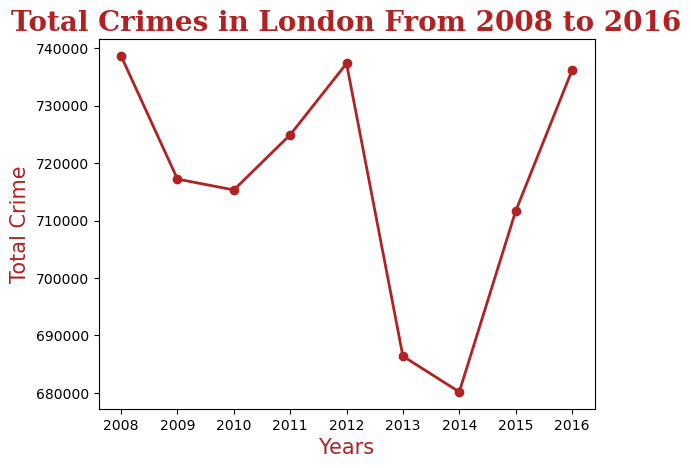

In [25]:
font = {
    'family': 'Serif',
    'color': 'firebrick',
    'weight': 'bold',
    'size': 20
}
plt.figure(figsize=(16, 6), tight_layout=True)


df_year.plot(kind='line', marker='o', linewidth=2, color='firebrick')

plt.xlabel('Years', color='firebrick', fontsize=15)
plt.ylabel('Total Crime', color='firebrick', fontsize=15)
plt.title('Total Crimes in London From 2008 to 2016', fontdict=font)
plt.legend().remove()
plt.show()

Tahun dengan kasus kriminal paling banyak terjadi adalah tahun 2008

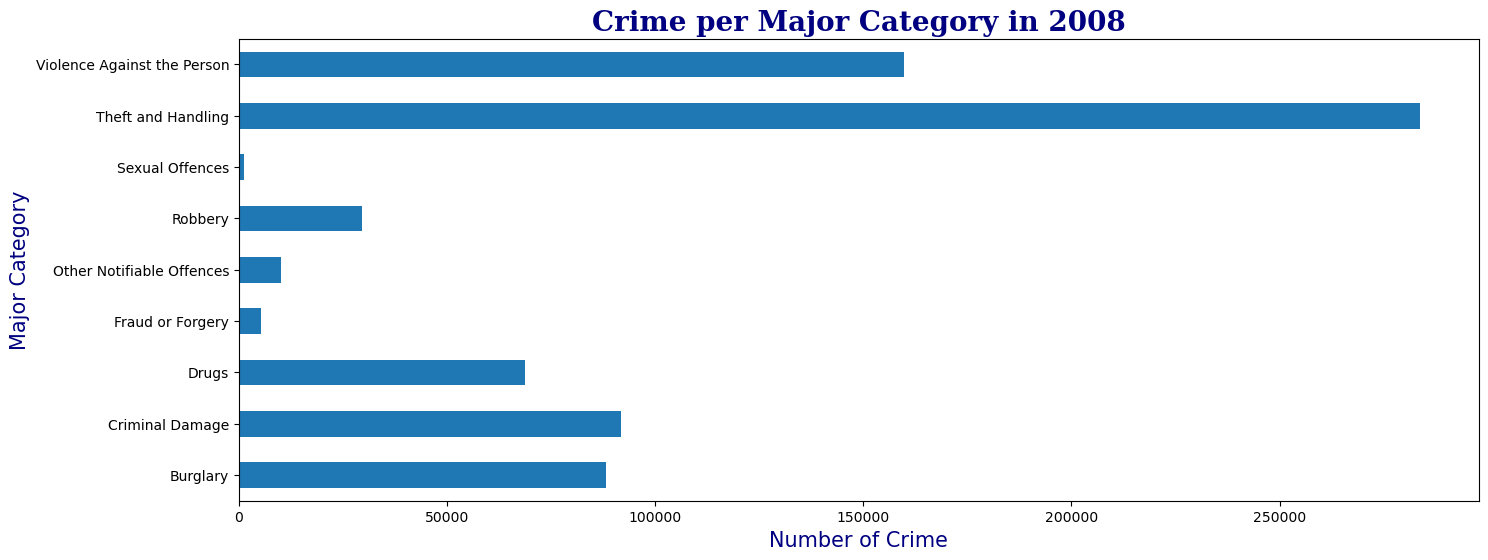

In [26]:
df_year_2008.plot(kind='barh', figsize=(16, 6), legend=False)
plt.xlabel('Number of Crime', color='navy', fontsize=15)
plt.ylabel('Major Category', color='navy', fontsize=15)
plt.title('Crime per Major Category in 2008', color='navy', fontdict=font)

plt.show()

Major Category paling banyak pada tahun 2008 adalah Theft and Handling

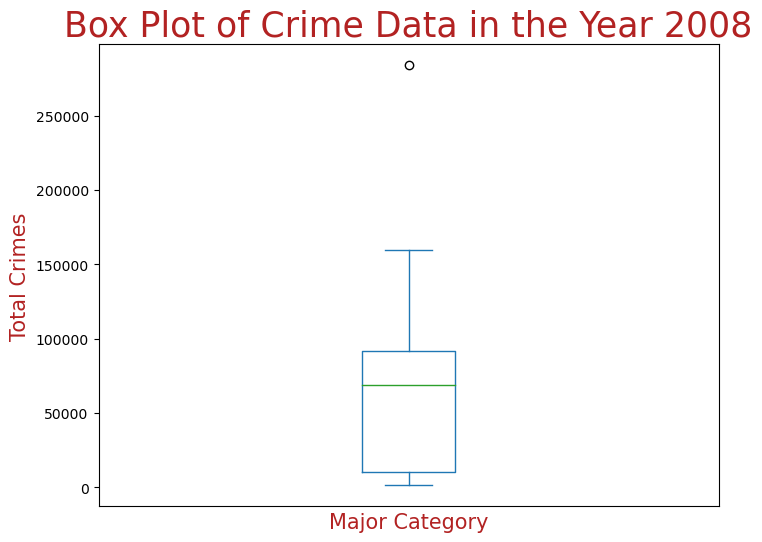

In [27]:
df_year_2008.plot(kind='box', figsize=(8, 6))

plt.title('Box Plot of Crime Data in the Year 2008', color='firebrick', fontsize=25)
plt.ylabel('Total Crimes', color='firebrick', fontsize=15)
plt.xlabel('Major Category', color='firebrick', fontsize=15)
plt.xticks([])

plt.show()

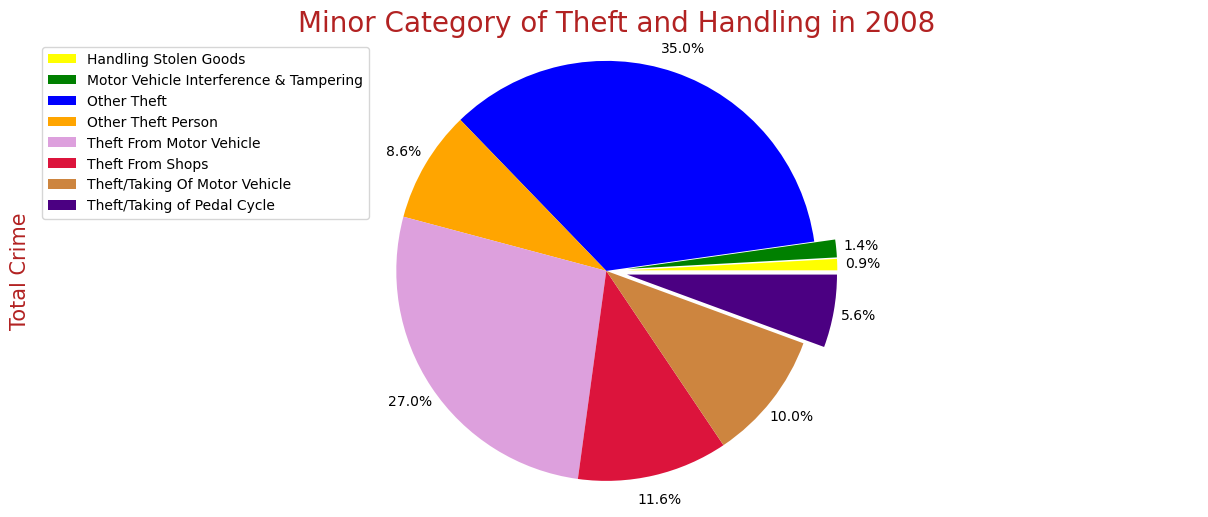

In [28]:
color_list = ['yellow', 'green', 'blue', 'orange', 'plum', 'crimson', 'peru', 'indigo']
plt.figure(figsize=(15, 6))
explode_list = [0.1, 0.1, 0, 0, 0, 0, 0, 0.1]

df_year_2008_theft_and_handling['total_crime'].plot(kind='pie', autopct='%1.1f%%', pctdistance=1.12, labels=None, colors=color_list, explode=explode_list)

plt.ylabel('Total Crime', fontsize=15, color='firebrick')
plt.legend(labels=df_year_2008_theft_and_handling['minor_category'], loc='upper left')
plt.axis('equal')
plt.title('Minor Category of Theft and Handling in 2008', color='firebrick', fontsize=20)

plt.show()

Tipe Theft and Handling paling banyak di tahun 2008 adalah Other Theft dan yang paling sedikit adalah Handling Stolen Goods

#### Month

<Figure size 2000x1000 with 0 Axes>

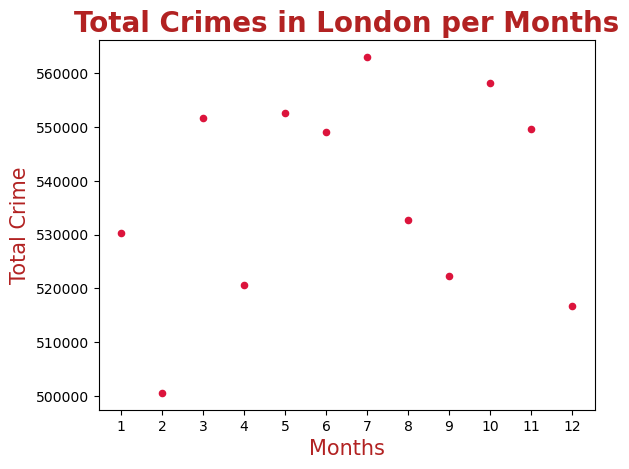

In [29]:
font2 = {
    'family': 'sans-serif',
    'color': 'firebrick',
    'weight': 'bold',
    'size': 20
}
plt.figure(figsize=(20, 10))

df_month.plot(kind='scatter', x='month', y='total_crime', color='crimson', legend=False)

plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
plt.xlabel('Months', color='firebrick', fontsize=15)
plt.ylabel('Total Crime', color='firebrick', fontsize=15)
plt.title('Total Crimes in London per Months', fontdict=font2)

plt.show()

### Major Category

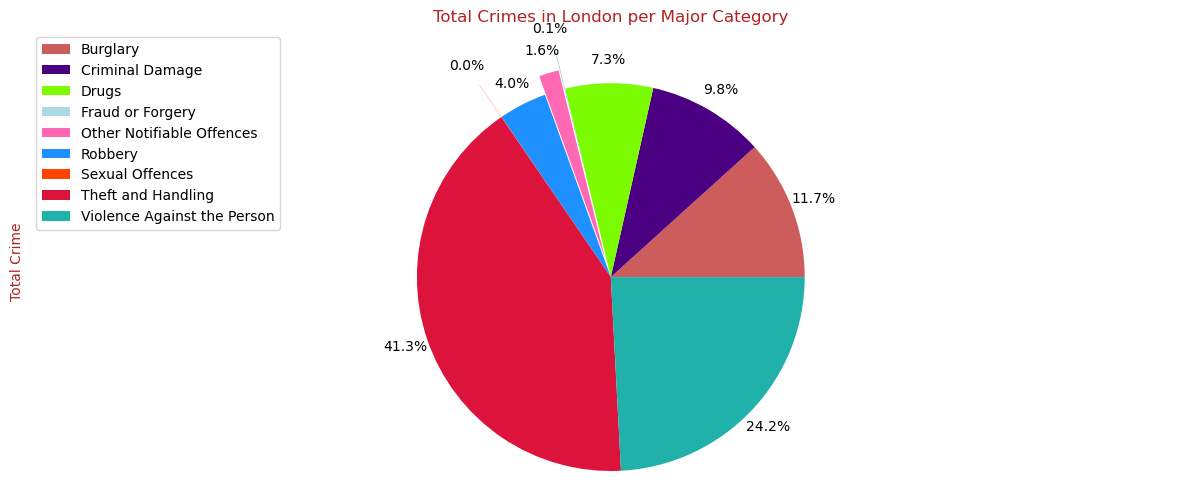

In [30]:
color_list = ['indianred', 'indigo', 'lawngreen', 'lightblue', 'hotpink', 'dodgerblue', 'orangered', 'crimson', 'lightseagreen']
plt.figure(figsize=(15, 6))
exoplode_list = [0, 0, 0, 0.2, 0.1, 0, 0.2, 0, 0]

df_major_category['total_crime'].plot(kind='pie', autopct='%1.1f%%', labels=None, pctdistance=1.12, colors=color_list, explode=exoplode_list)
plt.ylabel('Total Crime', color='firebrick')
plt.legend(labels=df_major_category.index, loc='upper left')
plt.title('Total Crimes in London per Major Category', color='firebrick')
plt.axis('equal')

plt.show()

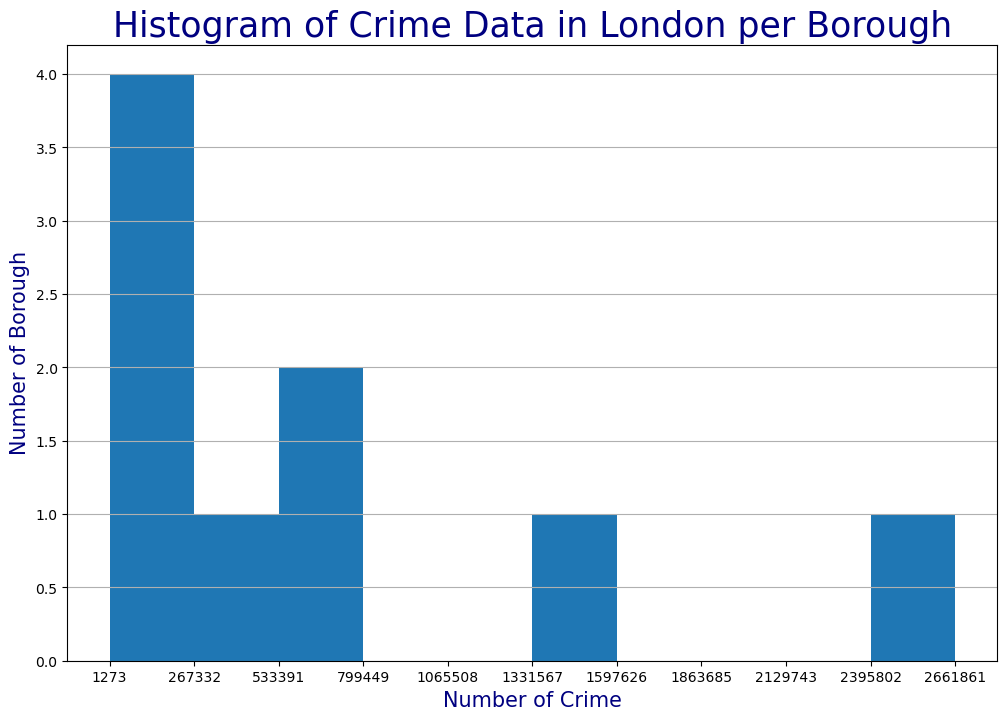

In [31]:
count, bin_edges = np.histogram(df_major_category)
fig, ax = plt.subplots(figsize=(12, 8))

df_major_category.plot.hist(ax=ax, legend=False, xticks=bin_edges)
#df_major_category,plot.kde(ax=ax, legend=False)
ax.set_title('Histogram of Crime Data in London per Borough', color='navy', fontsize=25)
ax.set_ylabel('Number of Borough', color='navy', fontsize=15)
ax.set_xlabel('Number of Crime', color='navy', fontsize=15)
ax.grid(axis='y')
#ax.set_xlim(0, 500000)

plt.ticklabel_format(style='plain', axis='x')
#plt.ticklabel_format(style='plain', axis='y')
plt.show()

Jenis major category yang paling dominan adalah Theft and Handling. Sedangkan tiga major category yang paling sedikit adalah Other Notofiable Offences, Fraud and Forgery, dan Sexual Offences

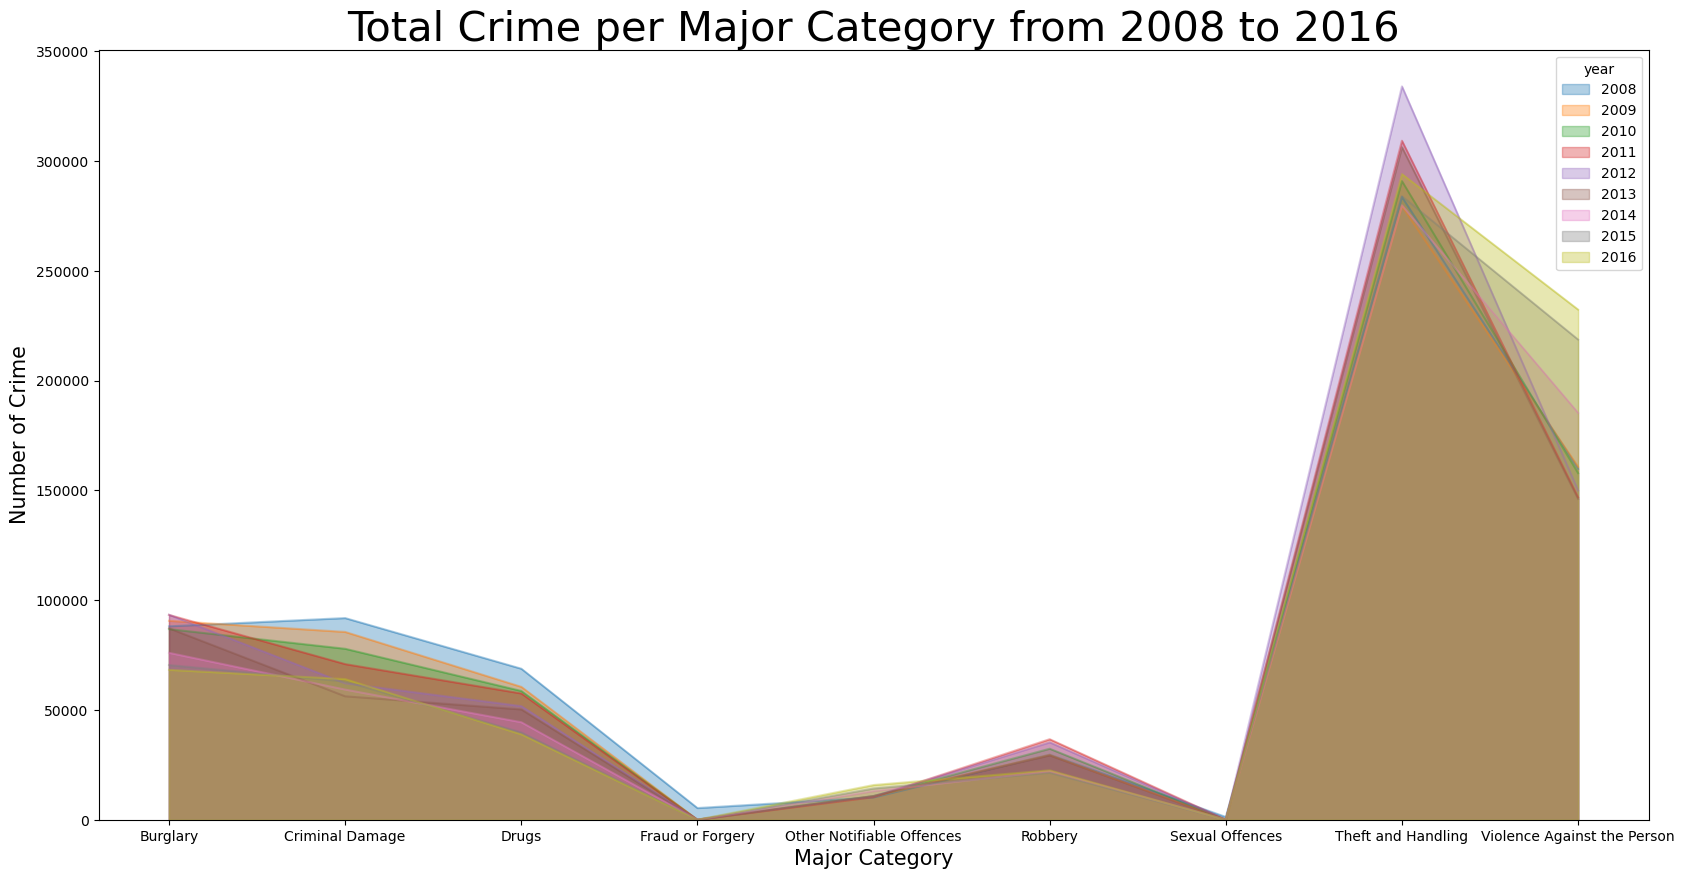

In [32]:
df_major_category_per_year.plot(kind='area', stacked=False, alpha=0.35, figsize=(20, 10))

plt.title('Total Crime per Major Category from 2008 to 2016', fontsize=30)
plt.ylabel('Number of Crime', fontsize=15)
plt.xlabel('Major Category', fontsize=15)

plt.show()

Terlihat dari plot diatas memang Theft and Handling selalu menjadi major category paling banyak dari tahun ke tahun, dengan tahun 2012 sebagai tahun terbanyak. Sementara itu, tiga major category yang paling sedikit tetap Other Notifiable Offences, Fraud or Forgery, dan Sexual Offences.

### Minor Category

<Figure size 1600x600 with 0 Axes>

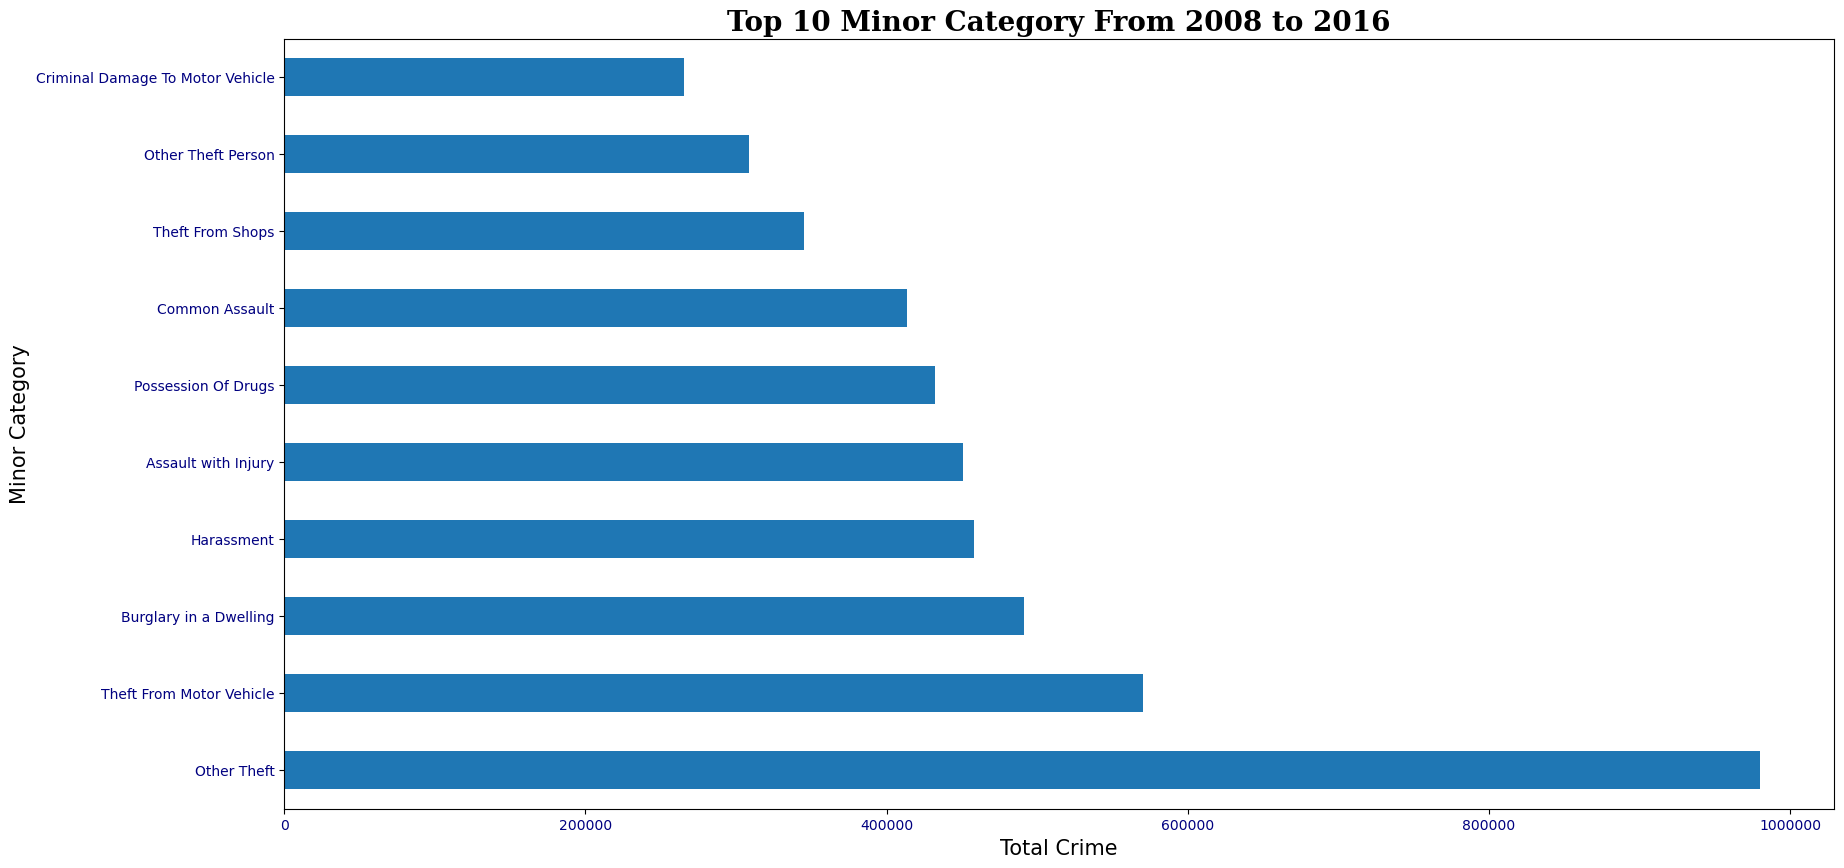

In [33]:
plt.figure(figsize=(16,6))
top10_crime_per_minor_category.plot(kind='barh', figsize=(20, 10), legend=False)
plt.xticks(color='navy')
plt.yticks(color='navy')
plt.xlabel('Total Crime', color='black', fontsize=15)
plt.ylabel('Minor Category', color='black', fontsize=15)
plt.title('Top 10 Minor Category From 2008 to 2016', color='black', fontdict=font)

plt.ticklabel_format(style='plain', axis='x')
plt.show()

### Borough

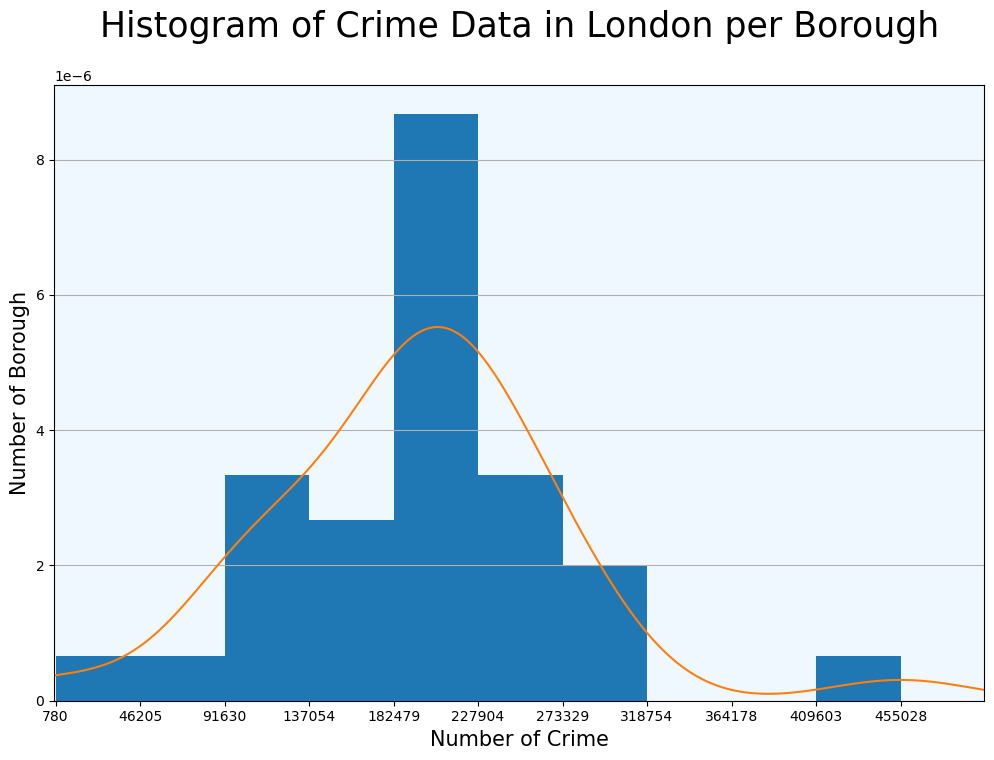

In [34]:
count, bin_edges = np.histogram(df_borough)
fig, ax = plt.subplots(figsize=(12, 8))

df_borough.plot.hist(density=True, ax=ax, legend=False, xticks=bin_edges)
df_borough.plot.kde(ax=ax, legend=False)
ax.set_title('Histogram of Crime Data in London per Borough\n', fontsize=25)
ax.set_ylabel('Number of Borough', fontsize=15)
ax.set_xlabel('Number of Crime', fontsize=15)
ax.grid(axis='y')
ax.set_facecolor('#f0f8ff')
ax.set_xlim(0, 500000)

plt.show()

Dari histogram di atas, jumlah kejahatan yang paling umum per borough adalah 182479 - 227904 yang terdaat di sekitar 122 borough

In [35]:
stopwords = set(STOPWORDS)

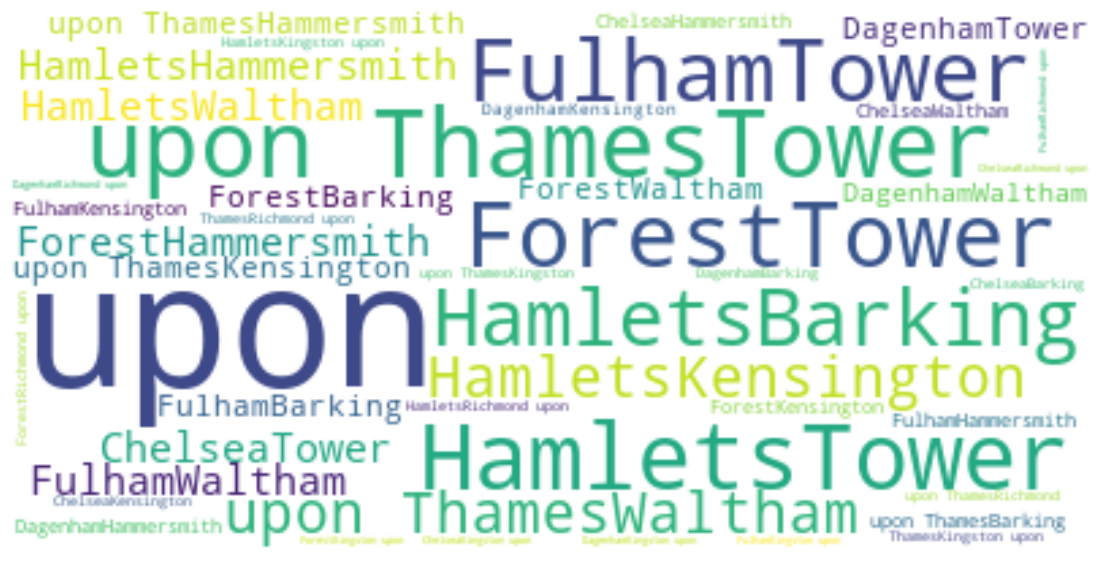

In [36]:
df_borough_wc = df_without_null[df_without_null['year'].isin([2016])]
df_borough_wc = df_borough_wc['borough'].str.cat(sep='')

borough_wc = WordCloud(
    background_color = 'white',
    stopwords=STOPWORDS
)

stopwords.add('upon')

borough_wc.generate(df_borough_wc)

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(borough_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [37]:
print("Crime rate in borough of london")
df2 = df[['borough', 'value']]
world_geo = r'https://raw.githubusercontent.com/radoi90/housequest-data/master/london_borough.geojson'
world_map = folium.Map(location=[51.509865,-0.118092], zoom_start=10, tiles='Stamen Terrain')

world_map.choropleth(
    geo_data=world_geo,
    name='choropleth',
    data=df2,
    colums=['borough', 'value'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Crime Rate in Borough of London'
)

#folium.LayerControl().add_to(world_map)
world_map.save('LondonCrime.html')
display(world_map)

Crime rate in borough of london


/home/novita/Hacktiv8/env/lib/python3.11/site-packages/folium/folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


TypeError: 'NoneType' object is not subscriptable

## Kesimpulan

- Jenis kejahatan yang paling sering terjadi di London adalah Theft and Handling

- Banyak yang melakukan tindak kriminal di bulan Juli atau Agustus dan paling sedikit di bulan Februari, April, dan Desember

- Other Notifiable Offences dan Violences Against the Person mencapai titik tertinggi di tahun 2016